<a href="https://colab.research.google.com/github/elilibm/handwritten_digit_recognition/blob/main/handwritten_digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [5]:
train_data = datasets.MNIST(
    root = "data",
    train = True,
    transform = ToTensor (),
    download = True,
)
test_data = datasets.MNIST(
    root = "data",
    train = False,
    transform = ToTensor (),
    download = True,
)

In [6]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
test_data


Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [10]:
from torch.utils.data import DataLoader

loaders = {
    "train" : DataLoader(train_data,
                       batch_size = 100,
                       shuffle=True,
                       num_workers=1),
    "test" : DataLoader(test_data,
                       batch_size = 100,
                       shuffle=True,
                       num_workers=1),
}

In [11]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7ccd8b6af5e0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7ccd8b6afa90>}

In [26]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    self.conv1 = nn.Conv2d (1, 10, kernel_size =5)
    self.conv2 = nn.Conv2d (10, 20, kernel_size=5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear (320, 50)
    self.fc2 = nn.Linear(50,10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x),2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
    x = x.view(-1, 320)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training=self.training)
    x = self.fc2(x)

    return F.softmax(x)

In [32]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr = 0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(loaders["train"]):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 20 == 0:
      print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100.*batch_idx/len(loaders["train"]):.0f}%)]\t {loss.item():.6f}')

def test():
  model.eval()

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data, target in loaders['test']:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += loss_fn(output, target).item()
      pred = output.argmax(dim=1,keepdim=True)
      correct += pred.eq(target.view_as(pred)).sum().item()

      test_loss /= len(loaders['test'].dataset)
      print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy {correct}/{len(loaders["test"].dataset)}({100. * correct/len(loaders["test"].dataset):.0f}%\n)')



In [33]:
for epoch in range(1, 11):
  train(epoch)
  test()


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
<ipython-input-26-204139714df2>:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	 2.301220
Train Epoch: 1 [2000/60000 (3%)]	 2.282935
Train Epoch: 1 [4000/60000 (7%)]	 2.175629
Train Epoch: 1 [6000/60000 (10%)]	 1.989680
Train Epoch: 1 [8000/60000 (13%)]	 1.850374
Train Epoch: 1 [10000/60000 (17%)]	 1.785630
Train Epoch: 1 [12000/60000 (20%)]	 1.867925
Train Epoch: 1 [14000/60000 (23%)]	 1.788595
Train Epoch: 1 [16000/60000 (27%)]	 1.767957
Train Epoch: 1 [18000/60000 (30%)]	 1.747855
Train Epoch: 1 [20000/60000 (33%)]	 1.736569
Train Epoch: 1 [22000/60000 (37%)]	 1.754608
Train Epoch: 1 [24000/60000 (40%)]	 1.719564
Train Epoch: 1 [26000/60000 (43%)]	 1.697619
Train Epoch: 1 [28000/60000 (47%)]	 1.629352
Train Epoch: 1 [30000/60000 (50%)]	 1.683799
Train Epoch: 1 [32000/60000 (53%)]	 1.716129
Train Epoch: 1 [34000/60000 (57%)]	 1.653288
Train Epoch: 1 [36000/60000 (60%)]	 1.581111
Train Epoch: 1 [38000/60000 (63%)]	 1.649803
Train Epoch: 1 [40000/60000 (67%)]	 1.624344
Train Epoch: 1 [42000/60000 (70%)]	 1.630778
Train Epoch: 1 [44000

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



Test set: Average loss: 0.0002, Accuracy 94/10000(1%
)

Test set: Average loss: 0.0002, Accuracy 190/10000(2%
)

Test set: Average loss: 0.0002, Accuracy 282/10000(3%
)

Test set: Average loss: 0.0002, Accuracy 377/10000(4%
)

Test set: Average loss: 0.0002, Accuracy 470/10000(5%
)

Test set: Average loss: 0.0002, Accuracy 563/10000(6%
)

Test set: Average loss: 0.0002, Accuracy 657/10000(7%
)

Test set: Average loss: 0.0002, Accuracy 750/10000(8%
)

Test set: Average loss: 0.0002, Accuracy 842/10000(8%
)

Test set: Average loss: 0.0001, Accuracy 938/10000(9%
)

Test set: Average loss: 0.0001, Accuracy 1036/10000(10%
)

Test set: Average loss: 0.0002, Accuracy 1127/10000(11%
)

Test set: Average loss: 0.0002, Accuracy 1220/10000(12%
)

Test set: Average loss: 0.0002, Accuracy 1313/10000(13%
)

Test set: Average loss: 0.0002, Accuracy 1405/10000(14%
)

Test set: Average loss: 0.0002, Accuracy 1501/10000(15%
)

Test set: Average loss: 0.0002, Accuracy 1593/10000(16%
)

Test set: Average

Prediction: 5


<ipython-input-26-204139714df2>:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


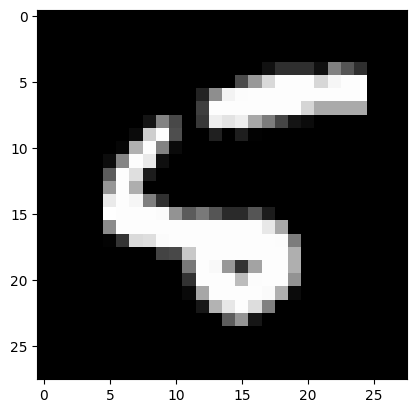

In [37]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[8]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item()

print(f'Prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')